In [6]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# read in gene location information
gloc = pd.read_csv("../data/gene_locations.tsv",sep="\t")
gloc.head()

,seqname,start,end,gene_name
0,chr1,923923,944575,SAMD11
1,chr1,944203,959309,NOC2L
2,chr1,960584,965719,KLHL17
3,chr1,966482,975865,PLEKHN1
4,chr1,975198,982117,PERM1


In [8]:
adata1 = sc.read_h5ad("../data/ENCFF138QCP.h5ad")
adata1

AnnData object with n_obs × n_vars = 737280 × 69690
    var: 'feature_types', 'gene_symbols', 'gene_names'
    uns: 'annotation', 'biosample_accession', 'derived_from', 'description', 'experiment_accession', 'filtered_barcodes', 'genome'

In [1]:
#adata1.obs

In [5]:
len(set(adata1.obs.index))

737280

In [6]:
adata1.var

,feature_types,gene_symbols,gene_names
ENSMUSG00000102693.1,Gene Expression,RP23-271O17.1,RP23-271O17.1
ENSMUSG00000064842.1,Gene Expression,Gm26206,Gm26206
ENSMUSG00000051951.5,Gene Expression,Xkr4,Xkr4
ENSMUSG00000102851.1,Gene Expression,RP23-317L18.1,RP23-317L18.1
ENSMUSG00000103377.1,Gene Expression,RP23-317L18.4,RP23-317L18.4
...,...,...,...
gSpikein_ERCC-00164,Gene Expression,gSpikein_ERCC-00164,gSpikein_ERCC-00164
gSpikein_ERCC-00165,Gene Expression,gSpikein_ERCC-00165,gSpikein_ERCC-00165
gSpikein_ERCC-00168,Gene Expression,gSpikein_ERCC-00168,gSpikein_ERCC-00168
gSpikein_ERCC-00170,Gene Expression,gSpikein_ERCC-00170,gSpikein_ERCC-00170


In [17]:
c1_genes = gloc[gloc["seqname"]=="chr1"]
c1_genes.index # ideally index would be e.g. ENSMUSG00000...

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637],
           dtype='int64', length=1638)

In [52]:
len(adata1.var)

69690

In [37]:
#print(adata1.X)

In [34]:
#print(adata1.X[737278:]) # tuple is (obs-sequence, gene_num), number is I am guessing maybe some measure of expression level??

# I shall assume this is number of cells

In [35]:
#print(np.argwhere(adata1.X[:10].todense()!=0)) # extract tuples (obs-seq, gene_idx)

In [36]:
#print(np.sum(adata1.X[:10].toarray(),axis=0)) # list of 69690. 
# At the position corresponding to gene_idx, it will have some value we need.

In [51]:
#print(np.sum(adata1.X[31:38].toarray(),axis=1)) # for counts of each observed sequence # we don't really need this?
# running this kills kernel. DO NOT RUN.

In [49]:
#print(np.argwhere(adata1.X[31].toarray()!=0))

In [50]:
#print(np.argwhere(np.sum(adata1.X[31].toarray(),axis=0)!=0))

In [18]:
x = adata1.X.toarray() # 737280 arrays of length 69690

In [ ]:
# get info for chromosome 1 only.
x1 = x[:,c1_genes.index]

In [ ]:
sns.heatmap(x1)

In [39]:
np.argwhere(adata1.X[737278].toarray()!=0)

array([[    0,    31],
       [    0,    35],
       [    0,    43],
       ...,
       [    0, 43336],
       [    0, 43340],
       [    0, 43343]])

In [45]:
len(np.argwhere(adata1.X[737278].toarray()!=0))

2892

In [47]:
x[np.argwhere(adata1.X[737278].toarray()!=0)[2889][0],np.argwhere(adata1.X[737278].toarray()!=0)[2889][1]]

12.0

In [33]:
x = adata1.X[737278].toarray()
x[0,43336]

12.0

In [64]:
df = adata1.var
df['gene_names'] = [g.upper() for g in df['gene_names']]
df['counts'] = [0]*len(df) # will update later
df.head()

,feature_types,gene_symbols,gene_names,counts
ENSMUSG00000102693.1,Gene Expression,RP23-271O17.1,RP23-271O17.1,0
ENSMUSG00000064842.1,Gene Expression,Gm26206,GM26206,0
ENSMUSG00000051951.5,Gene Expression,Xkr4,XKR4,0
ENSMUSG00000102851.1,Gene Expression,RP23-317L18.1,RP23-317L18.1,0
ENSMUSG00000103377.1,Gene Expression,RP23-317L18.4,RP23-317L18.4,0


In [56]:
idx_to_count = dict(zip(range(len(adata1.var)), [0]*len(adata1.var)))

In [68]:
# using np for the 3d matrix kills kernel, so I must resort to this
for i in range(len(set(adata1.obs.index))): # 
    info = adata1.X[i].toarray()
    tuples = np.argwhere(info!=0)
    for tup in tuples:
        idx_to_count[tup[1]] += info[tup[0],tup[1]]

In [83]:
count_list = np.zeros(len(adata1.var))
#n_cells = np.zeros(len(adata1.var))
for i in range(len(set(adata1.obs.index))): # 
    if i % 100000 == 0:
        print("Progress: Completed iteration: ", i)
    info = adata1.X[i].toarray()
    tuples = np.argwhere(info!=0)
    for tup in tuples:
        count_list[tup[1]] += info[tup[0],tup[1]]
        #n_cells[tup[1]] += 1

Progress: Completed iteration:  0
Progress: Completed iteration:  100000
Progress: Completed iteration:  200000
Progress: Completed iteration:  300000
Progress: Completed iteration:  400000
Progress: Completed iteration:  500000
Progress: Completed iteration:  600000
Progress: Completed iteration:  700000


In [86]:
df["counts"] = count_list

In [95]:
df.head()

,feature_types,gene_symbols,gene_names,counts
ENSMUSG00000102693.1,Gene Expression,RP23-271O17.1,RP23-271O17.1,0.0
ENSMUSG00000064842.1,Gene Expression,Gm26206,GM26206,0.0
ENSMUSG00000051951.5,Gene Expression,Xkr4,XKR4,8.0
ENSMUSG00000102851.1,Gene Expression,RP23-317L18.1,RP23-317L18.1,0.0
ENSMUSG00000103377.1,Gene Expression,RP23-317L18.4,RP23-317L18.4,22.0


In [96]:
df_trimmed = df[df["counts"]>0]
df_trimmed.head()

,feature_types,gene_symbols,gene_names,counts
ENSMUSG00000051951.5,Gene Expression,Xkr4,XKR4,8.0
ENSMUSG00000103377.1,Gene Expression,RP23-317L18.4,RP23-317L18.4,22.0
ENSMUSG00000104017.1,Gene Expression,RP23-317L18.3,RP23-317L18.3,20.0
ENSMUSG00000103025.1,Gene Expression,RP23-115I1.6,RP23-115I1.6,3.0
ENSMUSG00000089699.1,Gene Expression,Gm1992,GM1992,3.0


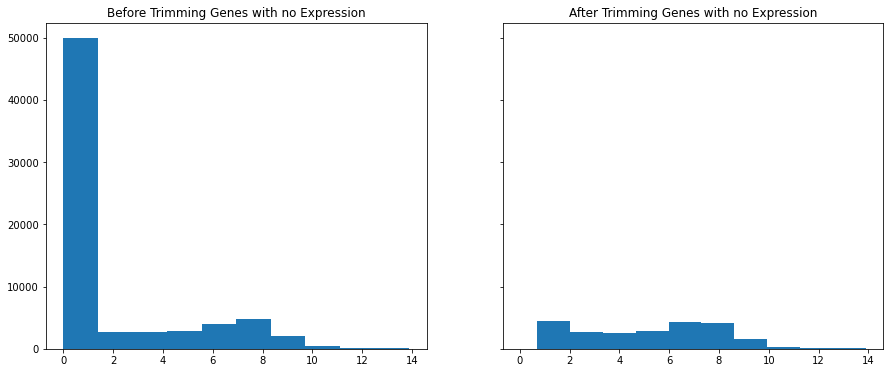

In [103]:
fig, ax = plt.subplots(1,2,sharey=True,sharex=True,figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Before Trimming Genes with no Expression")
plt.hist(np.log(df["counts"]+1))
plt.subplot(1,2,2)
plt.title("After Trimming Genes with no Expression")
plt.hist(np.log(df_trimmed["counts"]+1))
plt.show()